<a href="https://colab.research.google.com/github/l-Monarch-l/Laborat/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B56.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Загрузка данных
data = pd.read_csv('diamond.csv')

# Просмотр первых строк датасета
print(data.head())

# Преобразование категориальных переменных в числовые
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Проверка типов данных
print(data.dtypes)

# Нормализация данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


   Carat Weight    Cut Color Clarity Polish Symmetry Report  Price
0          1.10  Ideal     H     SI1     VG       EX    GIA   5169
1          0.83  Ideal     H     VS1     ID       ID   AGSL   3470
2          0.85  Ideal     H     SI1     EX       EX    GIA   3183
3          0.91  Ideal     E     SI1     VG       VG    GIA   4370
4          0.83  Ideal     G     SI1     EX       EX    GIA   3171
Carat Weight    float64
Cut               int64
Color             int64
Clarity           int64
Polish            int64
Symmetry          int64
Report            int64
Price             int64
dtype: object


In [3]:
# Определение числа кластеров
kmeans = KMeans(n_clusters=4, random_state=42)
clusters_kmeans = kmeans.fit_predict(data_scaled)

# Добавление кластеров
data['KMeans_Cluster'] = clusters_kmeans

In [4]:
# Применение DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(data_scaled)

# Добавление кластеров
data['DBSCAN_Cluster'] = clusters_dbscan
# Описание кластеров K-Means
print(data.groupby('KMeans_Cluster').mean())

                Carat Weight       Cut     Color   Clarity    Polish  \
KMeans_Cluster                                                         
0                   1.120381  3.591387  2.825238  3.314972  2.043565   
1                   1.122328  2.541377  2.618716  3.341067  0.052591   
2                   2.114716  2.762301  2.850114  3.325511  1.413323   
3                   1.097919  1.465803  2.642189  3.096472  2.139669   

                Symmetry    Report         Price  DBSCAN_Cluster  
KMeans_Cluster                                                    
0               2.175263  0.713070   7436.762644       92.388082  
1               0.082753  0.990719   7971.873163       66.511988  
2               1.431491  0.906132  27314.903104       69.720666  
3               2.189345  0.982001   6844.954644       72.852412  


In [5]:
# Описание кластеров DBSCAN
print(data[data['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').mean())

                Carat Weight  Cut  Color  Clarity  Polish  Symmetry  Report  \
DBSCAN_Cluster                                                                
0                   1.068571  2.0    4.0      2.0     3.0       0.0     1.0   
1                   1.119091  2.0    4.0      2.0     0.0       0.0     1.0   
2                   0.944783  2.0    1.0      2.0     3.0       3.0     1.0   
3                   1.153333  2.0    3.0      2.0     0.0       0.0     1.0   
4                   0.984706  4.0    0.0      2.0     3.0       1.0     1.0   
...                      ...  ...    ...      ...     ...       ...     ...   
317                 1.056000  4.0    3.0      3.0     1.0       3.0     1.0   
318                 1.076000  4.0    2.0      6.0     3.0       0.0     1.0   
319                 2.016000  4.0    2.0      2.0     3.0       1.0     1.0   
320                 0.863333  2.0    4.0      5.0     0.0       0.0     1.0   
321                 0.916667  4.0    5.0      3.0   

In [6]:
db_index_kmeans = davies_bouldin_score(data_scaled, clusters_kmeans)
db_index_dbscan = davies_bouldin_score(data_scaled[clusters_dbscan != -1], clusters_dbscan[clusters_dbscan != -1])
print(f'Davies-Bouldin Index K-Means: {db_index_kmeans}')
print(f'Davies-Bouldin Index DBSCAN: {db_index_dbscan}')

Davies-Bouldin Index K-Means: 1.919458834276588
Davies-Bouldin Index DBSCAN: 0.6852345967011


In [8]:
! pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.0 MB/s eta 0:00:00


TypeError: Field elements must be 2- or 3-tuples, got '<class 'numpy.float64'>'

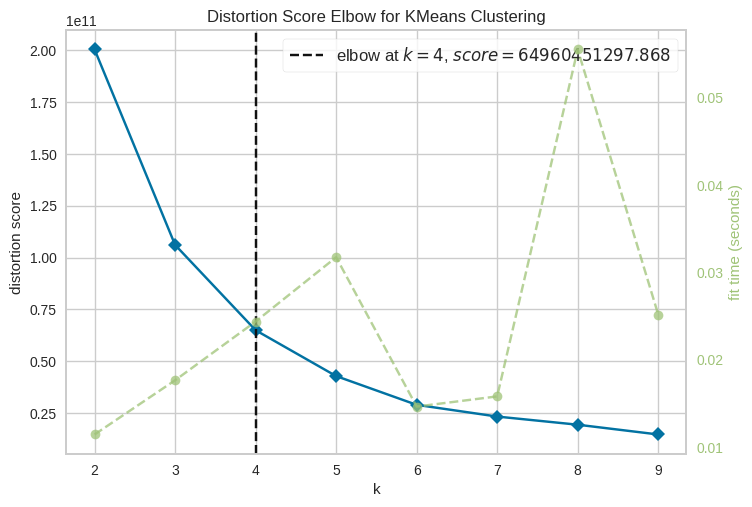

In [9]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

def interactive_kmeans_visualization(X, max_clusters, max_iterations):
    if isinstance(X, pd.DataFrame):
        if X.dtypes.any(np.dtype([np.float64, object])):
            X = X.fillna(X.median()).astype(str).values
        else:
            X = X.fillna(X.median()).values
    else:
        X = X.fillna(X.median()).astype(str)

    def plot_kmeans_iteration(X, centroids, labels=None, step=0):
        clear_output(wait=True)
        plt.figure(figsize=(8, 6))
        if labels is not None:
            plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, alpha=0.6)
        else:
            plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.6)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
        plt.title(f'K-means Iteration {str(step)}')
        plt.legend()
        plt.show()

    def k_means_interactive(X, k, max_iters):
        np.random.seed(42)
        centroids = X[np.random.choice(X.shape[0], k, replace=False)]
        for step in range(max_iters):
            distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
            labels = np.argmin(distances, axis=1)
            plot_kmeans_iteration(X, centroids, labels, step)
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
            if np.allclose(centroids, new_centroids):
                break
            centroids = new_centroids

    def run_kmeans(k, max_iters):
        k_means_interactive(X, k, max_iters)

    k_slider = widgets.IntSlider(value=3, min=2, max=max_clusters, step=1, description='Clusters (k):')
    iter_slider = widgets.IntSlider(value=10, min=1, max=max_iterations, step=1, description='Max Iterations:')

    interactive_plot = widgets.interactive(run_kmeans, k=k_slider, max_iters=iter_slider)
    interactive_plot.show()

# Create the K-Means model
model = KMeans()

# Create the visualizer
visualizer = KElbowVisualizer(model, k=(2, 10))

# Fit the data to the visualizer
visualizer.fit(data)

# Finalize and render the visualization
visualizer.finalize()
interactive_kmeans_visualization(X=data[:100], max_clusters=10, max_iterations=100)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Определяем количество кластеров k
k = 4  # Вы можете изменить это значение в соответствии с вашими данными

# Создаем и обучаем модель KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(data)
centroids = kmeans.cluster_centers_

# Добавляем метки кластеров в исходный DataFrame
df_k_means = data.copy()
df_k_means['Cluster'] = labels

# Вывод статистики по кластерам для каждого признака
print("Статистика по кластерам:")
for column in data.columns:
    print(f"\nСтатистика для признака '{column}':")
    cluster_stats = df_k_means.groupby('Cluster')[column].agg(['mean', 'std', 'min', 'max'])
    print(cluster_stats)

# Вычисление коэффициента силуэта
if k > 1:
    silhouette_avg = silhouette_score(data, labels)
    print(f"\nКоэффициент силуэта для k={k}: {silhouette_avg:.4f}")
else:
    print("\nКоэффициент силуэта не определен для k=1")

Статистика по кластерам:

Статистика для признака 'Carat Weight':
             mean       std   min   max
Cluster                                
0        1.057864  0.194775  0.75  2.00
1        2.144889  0.206882  1.29  2.91
2        1.766644  0.325949  1.00  2.68
3        2.258304  0.254207  1.62  2.81

Статистика для признака 'Cut':
             mean       std  min  max
Cluster                              
0        2.670268  1.215705    0    4
1        2.719937  1.064801    0    4
2        2.728656  1.118185    0    4
3        2.857143  0.994192    1    4

Статистика для признака 'Color':
             mean       std  min  max
Cluster                              
0        2.787135  1.574013    0    5
1        2.422468  1.238706    0    5
2        2.956044  1.565738    0    5
3        0.741071  0.956208    0    3

Статистика для признака 'Clarity':
             mean       std  min  max
Cluster                              
0        3.183157  1.336300    1    6
1        3.569620  1.1

In [11]:
from sklearn.cluster import DBSCAN

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

def interactive_dbscan_visualization(X):
    if isinstance(X, pd.DataFrame):
        X = X.values

    def plot_dbscan(X, labels, core_samples_mask, eps, min_samples, metric):
        clear_output(wait=True)
        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each)
                  for each in np.linspace(0, 1, len(unique_labels))]
        plt.figure(figsize=(8, 6))
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Черный цвет для шума
                col = [0, 0, 0, 1]

            class_member_mask = (labels == k)

            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=14)

            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=6)

        plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}, metric={metric}')
        plt.show()

    def run_dbscan(eps, min_samples, metric):
        # Обучение DBSCAN
        db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
        db.fit(X)
        labels = db.labels_
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        plot_dbscan(X, labels, core_samples_mask, eps, min_samples, metric)

    # Виджеты для настройки параметров
    eps_slider = widgets.FloatSlider(value=0.5, min=0.1, max=1.0, step=0.05, description='eps:')
    min_samples_slider = widgets.IntSlider(value=5, min=1, max=20, step=1, description='min_samples:')
    metric_dropdown = widgets.Dropdown(options=['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
                                       value='euclidean', description='metric:')

    ui = widgets.VBox([eps_slider, min_samples_slider, metric_dropdown])
    out = widgets.interactive_output(run_dbscan, {'eps': eps_slider, 'min_samples': min_samples_slider, 'metric': metric_dropdown})
    display(ui, out)

# Пример использования
interactive_dbscan_visualization(data[:120])


Output()

Количество кластеров: 0
Статистика по кластерам:

Статистика для признака 'Carat Weight':
Empty DataFrame
Columns: [mean, std, min, max, count]
Index: []

Статистика для признака 'Cut':
Empty DataFrame
Columns: [mean, std, min, max, count]
Index: []

Статистика для признака 'Color':
Empty DataFrame
Columns: [mean, std, min, max, count]
Index: []

Статистика для признака 'Clarity':
Empty DataFrame
Columns: [mean, std, min, max, count]
Index: []

Статистика для признака 'Polish':
Empty DataFrame
Columns: [mean, std, min, max, count]
Index: []

Статистика для признака 'Symmetry':
Empty DataFrame
Columns: [mean, std, min, max, count]
Index: []

Статистика для признака 'Report':
Empty DataFrame
Columns: [mean, std, min, max, count]
Index: []

Статистика для признака 'Price':
Empty DataFrame
Columns: [mean, std, min, max, count]
Index: []

Статистика для признака 'KMeans_Cluster':
Empty DataFrame
Columns: [mean, std, min, max, count]
Index: []

Статистика для признака 'DBSCAN_Cluster':
Empty

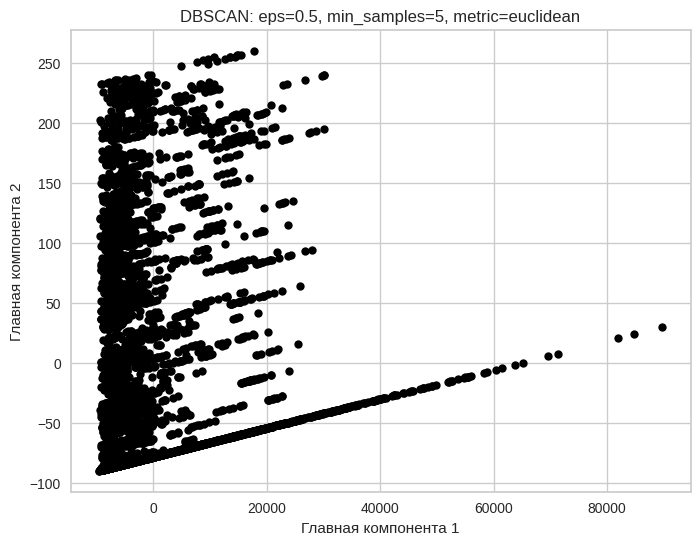

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Параметры DBSCAN
eps = 0.5
min_samples = 5
metric = 'euclidean'

# Обучение модели DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
labels = db.fit_predict(data)

# Добавляем метки кластеров в DataFrame
df_dbscan = data.copy()
df_dbscan['Cluster'] = labels

# Количество кластеров (исключая шум)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Количество кластеров: {n_clusters_}")

# Вывод статистики по кластерам
print("Статистика по кластерам:")
for column in data.columns:
    print(f"\nСтатистика для признака '{column}':")
    cluster_stats = df_dbscan[df_dbscan['Cluster'] != -1].groupby('Cluster')[column].agg(['mean', 'std', 'min', 'max', 'count'])
    print(cluster_stats)

# Вычисление коэффициента силуэта
if n_clusters_ > 1:
    silhouette_avg = silhouette_score(data[df_dbscan['Cluster'] != -1], labels[df_dbscan['Cluster'] != -1])
    print(f"\nКоэффициент силуэта для DBSCAN: {silhouette_avg:.4f}")
else:
    print("\nКоэффициент силуэта не определен, так как найден один кластер или данные являются шумом.")


# Визуализация результатов (с использованием PCA для снижения размерности)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    if k == -1:
        # Черный цвет для шума
        col = [0, 0, 0, 1]
    plt.plot(df_pca.loc[class_member_mask, 'PC1'],
             df_pca.loc[class_member_mask, 'PC2'],
             'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}, metric={metric}')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.show()


In [15]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
# Кластеризация K-means
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(data)

# Индекс Калински-Харабаза
ch_score_kmeans = calinski_harabasz_score(data, labels_kmeans)
print(f"Индекс Калински-Харабаза для K-means: {ch_score_kmeans:.4f}")

# Индекс Дэвиса-Болдина
db_score_kmeans = davies_bouldin_score(data, labels_kmeans)
print(f"Индекс Дэвиса-Болдина для K-means: {db_score_kmeans:.4f}")

# Коэффициент силуэта
sh_score_kmeans = silhouette_score(data, labels_kmeans)
print(f"Коэффициент силуэта для K-means: {sh_score_kmeans:.4f}")

Индекс Калински-Харабаза для K-means: 20272.6891
Индекс Дэвиса-Болдина для K-means: 0.5191
Коэффициент силуэта для K-means: 0.6061


In [16]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

eps = 0.5
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(data)

# Исключаем шумовые точки (метки -1)
mask = labels_dbscan != -1
df_scaled_dbscan = data[mask]
labels_dbscan_filtered = labels_dbscan[mask]

# Проверяем, есть ли достаточное количество кластеров для расчета метрик
if len(set(labels_dbscan_filtered)) > 1:
    # Индекс Калински-Харабаза
    ch_score_dbscan = calinski_harabasz_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Калински-Харабаза для DBSCAN: {ch_score_dbscan:.4f}")

    # Индекс Дэвиса-Болдина
    db_score_dbscan = davies_bouldin_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Дэвиса-Болдина для DBSCAN: {db_score_dbscan:.4f}")

    # Коэффициент силуэта
    sh_score_dbscan = silhouette_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Коэффициент силуэта для DBSCAN: {sh_score_dbscan:.4f}")
else:
    print("Недостаточно кластеров для вычисления метрик для DBSCAN.")


Недостаточно кластеров для вычисления метрик для DBSCAN.


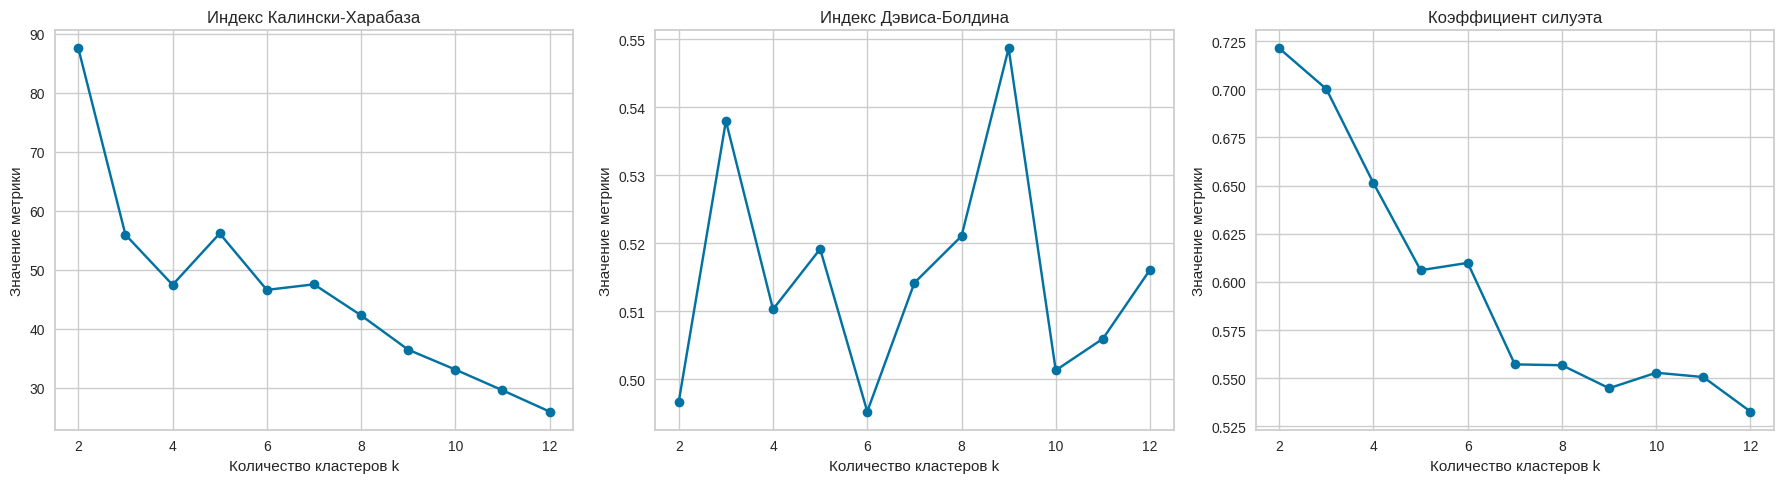

In [ ]:
# Диапазон значений k
k_range = range(2, 13)

# Списки для хранения метрик
ch_scores = []
db_scores = []
silhouette_scores = []

for k in k_range:
    # Создаем и обучаем модель KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data)

    # Вычисляем метрики
    ch_score = calinski_harabasz_score(df, labels)
    db_score = davies_bouldin_score(data, labels)
    silhouette_avg = silhouette_score(data, labels)

    # Сохраняем метрики
    ch_scores.append(ch_score)
    db_scores.append(db_score)
    silhouette_scores.append(silhouette_avg)

# Построение графиков
plt.figure(figsize=(18, 5))

# График Индекса Калински-Харабаза
plt.subplot(1, 3, 1)
plt.plot(k_range, ch_scores, marker='o')
plt.title('Индекс Калински-Харабаза')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

# График Индекса Дэвиса-Болдина
plt.subplot(1, 3, 2)
plt.plot(k_range, db_scores, marker='o')
plt.title('Индекс Дэвиса-Болдина')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

# График Коэффициента силуэта
plt.subplot(1, 3, 3)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Коэффициент силуэта')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

plt.tight_layout()
plt.show()


In [ ]:
pip install nltk pymorphy2 scikit-learn

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 52.1 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=4ec9ce3e48df22e017a14f5b5537d983fbdfde936f0206045545ea3a3f83e329
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pymorphy2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Инициализируем лемматизатор и список стоп-слов
morph = pymorphy2.MorphAnalyzer()
#russian_stopwords = stopwords.words('russian')
en_stopwords = stopwords.words('english')

# Чтение данных из файла
with open('/content/scp_object.txt', 'r', encoding='utf-8') as f:
    content = f.read()

# Разделяем данные на статьи
articles_raw = content.split('====')

# Извлекаем заголовки и тексты статей
titles = []
texts = []

for article in articles_raw:
    lines = article.strip().split('\n')
    if len(lines) >= 6:
        # Извлекаем заголовок и текст статьи
        title = lines[4]
        text = ' '.join(lines[5:])
        titles.append(title)
        texts.append(text)

In [ ]:
texts[:2]

['    GENERAL NOTICE 001-Alpha: In order to prevent knowledge of SCP-001 from being leaked, several/no false SCP-001 files have been created alongside the true file/files. All files concerning the nature of SCP-001, including the decoy/decoys, are protected by a memetic kill agent designed to immediately cause cardiac arrest in any nonauthorized personnel attempting to access the file. Revealing the true nature/natures of SCP-001 to the general public is cause for execution, except as required under ████-███-██████.     WARNING: ANY NON-AUTHORIZED PERSONNEL ACCESSING THIS FILE WILL BE IMMEDIATELY TERMINATED THROUGH BERRYMAN-LANGFORD MEMETIC KILL AGENT. SCROLLING DOWN WITHOUT PROPER MEMETIC INOCULATION WILL RESULT IN IMMEDIATE CARDIAC ARREST FOLLOWED BY DEATH. YOU HAVE BEEN WARNED.                                                                                                                                                                                                                 

In [ ]:
#russian_stopwords

In [ ]:
en_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def preprocess_text(texts):
    # Приводим к нижнему регистру
    texts = texts.lower()
    # Удаляем пунктуацию и цифры
    texts = re.sub(r'[^a-zA-Z\s]', ' ', texts)
     # Удаляем иероглифы и нежелательные символы
    texts = re.sub(r'[]', '', texts)
    texts = re.sub(r's+', ' ', texts)     # Удаляем лишние пробелы
    return ' '.join(texts.split())
    # Токенизация
    words = texts.split()
    # Удаление стоп-слов и лемматизация
    lemmatized = []
    for word in words:
        if word not in en_stopwords:
            lemma = morph.parse(word)[0].normal_form
            lemmatized.append(lemma)
    return ' '.join(lemmatized)

def clean_text_with_spaces(texts_preprocessed):
    cleaned_texts = []
    for texts_preprocessed in texts_preprocessed:  # Проходим по каждому тексту в списке
        for char in texts_preprocessed:
            if not char.isalnum() and char != ' ':  # Проверяем, является ли символ буквой или пробелом
                texts_preprocessed = texts_preprocessed.replace(char, ' ')  # Заменяем на пробел
        cleaned_texts.append(' '.join(texts_preprocessed.split()))  # Удаляем лишние пробелы и добавляем в список
    return cleaned_texts

# Применяем предобработку к каждому тексту
texts_preprocessed = [preprocess_text(texts) for texts in texts]
cleaned_texts = clean_text_with_spaces(texts_preprocessed)
#ascil and space

In [ ]:
cleaned_texts[:2]

['general notice alpha in order to prevent knowledge of cp from being leaked everal no fal e cp file have been created along ide the true file file all file concerning the nature of cp including the decoy decoy are protected by a memetic kill agent de igned to immediately cau e cardiac arre t in any nonauthorized per onnel attempting to acce the file revealing the true nature nature of cp to the general public i cau e for execution except a required under warning any non authorized per onnel acce ing thi file will be immediately terminated through berryman langford memetic kill agent crolling down without proper memetic inoculation will re ult in immediate cardiac arre t followed by death you have been warned memetic kill agent activated continued life ign confirmed removing afety interlock welcome authorized per onnel plea e elect your de ired file order randomly order chronologically erie code name jonathan ball heaf of paper code name dr gear the prototype code name dr clef the gate

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cleaned_texts)

In [ ]:
# Параметры DBSCAN могут требовать подбора
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2, metric='cosine')
labels = dbscan.fit_predict(X)

In [ ]:
# Создаем DataFrame с заголовками и метками кластеров
df = pd.DataFrame({'title': titles, 'label': labels})

# Выводим количество кластеров
unique_labels = set(labels)
n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
print(f'Количество кластеров: {n_clusters}')

# Анализируем кластеры
for label in unique_labels:
    if label == -1:
        continue  # Пропускаем шум
    cluster_titles = df[df['label'] == label]['title'].head(3)
    print(f'\nКластер {label}:')
    for title in cluster_titles:
        print(f'- {title}')

Количество кластеров: 25

Кластер 0:
- 
- 
- 

Кластер 1:
- Object Class: Safe
- Object Class: Euclid

Кластер 2:
- Object Class: Safe
- 

Кластер 3:
- Object Class: Safe
- 
- Object Class: Safe

Кластер 4:
- Object Class: Euclid (Potentially Keter)
- Object Class: Safe
- Object Class: Safe

Кластер 5:
- Object Class: Safe
- 

Кластер 6:
- Object Class: Safe
- Object Class: Safe

Кластер 7:
- Object Class: Safe
- 

Кластер 8:
- 
- Object Class: Euclid

Кластер 9:
- Object Class: Euclid
- 
- Object Class: Safe

Кластер 10:
- Object Class: Safe
- 

Кластер 11:
- 
-     padding: 0.5em;
- 

Кластер 12:
- 
- Object Class: Safe

Кластер 13:
- Object Class: Euclid
- Object Class: Safe
- Object Class: Safe

Кластер 14:
- - Hide component code
- - Hide component code

Кластер 15:
- Object Class: Euclid
- 

Кластер 16:
- Object Class: Safe
- 

Кластер 17:
- Object Class: Safe
- Object Class: Euclid

Кластер 18:
- 
- 

Кластер 19:
- 
- 

Кластер 20:
- Item #: SCP-2097
- Item #: SCP-2168

Класте

In [ ]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
from sklearn.decomposition import PCA
import plotly.graph_objects as go

# Применяем PCA для уменьшения размерности до 3 компонент
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X.toarray())

# Создаем DataFrame для визуализации
df_plot = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'PC3': X_pca[:, 2],
    'title': titles,
    'label': labels
})

# Создаем 3D Scatter Plot
fig = go.Figure(data=[go.Scatter3d(
    x=df_plot['PC1'],
    y=df_plot['PC2'],
    z=df_plot['PC3'],
    mode='markers',
    marker=dict(
        size=5,
        color=df_plot['label'],
        colorscale='Viridis',
        opacity=0.8
    ),
    text=df_plot['title'],
    hovertemplate='%{text}<extra></extra>'
)])

# Настраиваем внешний вид графика
fig.update_layout(
    title='3D PCA визуализация статей',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=50)
)

# Генерируем кадры для анимации вращения графика
frames = []
for angle in range(0, 360, 10):
    camera = dict(
        eye=dict(x=2*np.cos(np.radians(angle)), y=2*np.sin(np.radians(angle)), z=1.5)
    )
    frames.append(go.Frame(layout=dict(scene_camera=camera)))

# Добавляем кадры в график
fig.frames = frames

# Добавляем кнопки управления анимацией
fig.update_layout(
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        y=0.8,
        x=1.05,
        xanchor='left',
        yanchor='top',
        buttons=[dict(label='Вращать',
                      method='animate',
                      args=[None, dict(frame=dict(duration=50, redraw=True),
                                       transition=dict(duration=0),
                                       fromcurrent=True,
                                       mode='immediate')])]
    )]
)

# Отображаем график
fig.show()


Подводя итоги доп задания, получилось сделать парсер, спарсить 3000 статей, удалось их примерно адекватно разделить на кластеры почти, не до конца удалось обработать текст из-за чего есть кластеры пустышки, с пробелами, пытался избавиться от них разными спосабами, но где то что-то сделал не правильно, из-за чего не было эффекта, в целом примерное сложилось понимание о работе. Хотя сами кластеры стали более информативны и больше информации предлагает разных по мимо "scp class: safe/euclid/keter. Например номера объектов и краткое изложение некоторых статей, мало конечно, результат ожидался лучше, но скорее всего это связано с пустыми кластерами.